# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.0.1
Is using GPU? False


# Task 2: Preprocess Data

In [2]:
def get_three_classes(x, y):
#   this code is to be run on train and test set to select only 3 classes out of 10
# selecting indices where y 'classes' is 0, 1 and 2
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    # filter out required set out of dataset
    x = x[indices]
    y = y[indices]
    # random shuffle
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    # After shuffle, convert labels to one hot encodeed vectors using tf
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('Shape Before Filter : ' ,x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train,y_train = get_three_classes(x_train,y_train)
x_test,y_test = get_three_classes(x_test,y_test)
print('Shape After Filter : ' ,x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Shape Before Filter :  (50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Shape After Filter :  (15000, 32, 32, 3) (15000, 3) (3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

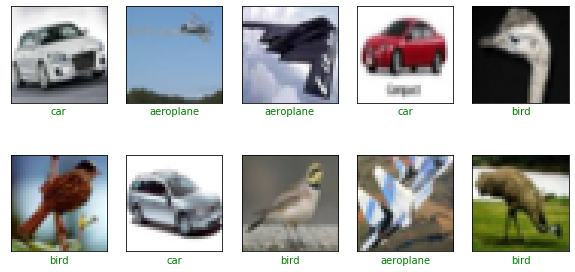

In [6]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x,y,pred):
    indices=np.random.choice(range(x.shape[0]),10,replace=False)
    x=x[indices]
    y=y[indices]
    pred=pred[indices]
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i) # (row,col,index_plot)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col='green' if np.argmax(y[i]) == np.argmax(pred[i]) else 'red'
        plt.xlabel(class_names[np.argmax(pred[i])],color=col)
    plt.show()

show_random_examples(x_train,y_train,y_train)

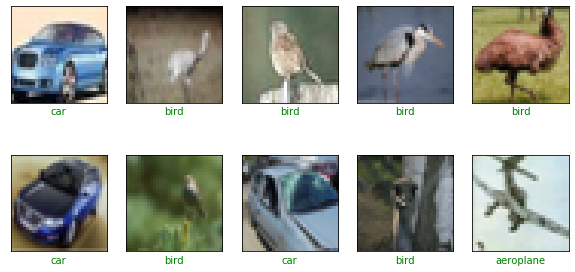

In [7]:
show_random_examples(x_test,y_test,y_test)

# Task 4: Create Model

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model,num_filters):
        # filters, kernel size, activation, padding
        model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters,3,activation='relu'))
        model.add(MaxPooling2D(pool_size=2)) # reduce size of rows and column to half of orig val
        model.add(Dropout(0.5))
        return model
    
    model=tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    model = add_conv_block(model,32)
    model = add_conv_block(model,64)
    model = add_conv_block(model,128)
    
    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))
    
    model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 15, 15, 64)       

# Task 5: Train the Model

In [17]:
h = model.fit(
x_train/255.,y_train,
validation_data = (x_test/255.,y_test),
    epochs=10, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3), # early stopping if accuracy doesnt change in 3 consecutive epochs
        tf.keras.callbacks.ModelCheckpoint(
            'models/model_{val_accuracy:.3f}.h5',
            save_best_only = True, save_weights_only = False, monitor = 'val_accuracy'
        )
    ]
)

Train on 15000 samples, validate on 3000 samples
Epoch 1/10
15000/15000 [==============================] - 136s 9ms/sample - loss: 0.5572 - accuracy: 0.7769 - val_loss: 2.4715 - val_accuracy: 0.3333
Epoch 2/10
15000/15000 [==============================] - 133s 9ms/sample - loss: 0.4879 - accuracy: 0.8026 - val_loss: 1.9130 - val_accuracy: 0.5017
Epoch 3/10
15000/15000 [==============================] - 134s 9ms/sample - loss: 0.4618 - accuracy: 0.8151 - val_loss: 1.7791 - val_accuracy: 0.5133
Epoch 4/10
15000/15000 [==============================] - 130s 9ms/sample - loss: 0.4197 - accuracy: 0.8329 - val_loss: 0.7407 - val_accuracy: 0.7387
Epoch 5/10
15000/15000 [==============================] - 132s 9ms/sample - loss: 0.3927 - accuracy: 0.8476 - val_loss: 0.4471 - val_accuracy: 0.8367
Epoch 6/10
15000/15000 [==============================] - 134s 9ms/sample - loss: 0.3579 - accuracy: 0.8591 - val_loss: 0.3789 - val_accuracy: 0.8503
Epoch 7/10
15000/15000 [===========================

# Task 6: Final Predictions

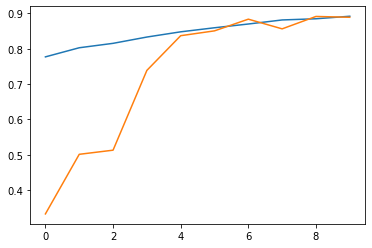

In [18]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label= 'training' )
plt.plot(range(len(val_accs)),val_accs, label='validation')

In [19]:
model = tf.keras.models.load_model('models/model_0.891.h5')

In [20]:
preds=model.predict(x_test/255.)

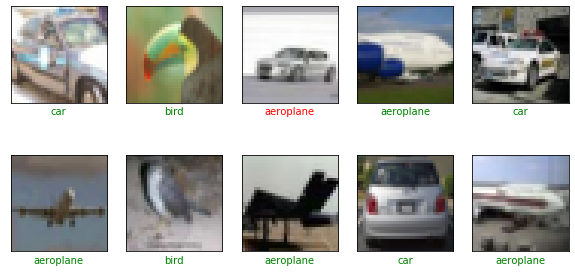

In [22]:
show_random_examples(x_test,y_test,preds)